# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Lai-&amp;-Robbins-lower-bound-for-stochastic-bandit-with-full-restart-points" data-toc-modified-id="Lai-&amp;-Robbins-lower-bound-for-stochastic-bandit-with-full-restart-points-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lai &amp; Robbins lower-bound for stochastic bandit with full restart points</a></div><div class="lev2 toc-item"><a href="#Creating-the-problem" data-toc-modified-id="Creating-the-problem-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Creating the problem</a></div><div class="lev3 toc-item"><a href="#Parameters-for-the-simulation" data-toc-modified-id="Parameters-for-the-simulation-111"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Parameters for the simulation</a></div><div class="lev3 toc-item"><a href="#Some-MAB-problem-with-Bernoulli-arms" data-toc-modified-id="Some-MAB-problem-with-Bernoulli-arms-112"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Some MAB problem with Bernoulli arms</a></div><div class="lev3 toc-item"><a href="#Some-RL-algorithms" data-toc-modified-id="Some-RL-algorithms-113"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Some RL algorithms</a></div><div class="lev2 toc-item"><a href="#Creating-the-Evaluator-object" data-toc-modified-id="Creating-the-Evaluator-object-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Creating the <code>Evaluator</code> object</a></div><div class="lev2 toc-item"><a href="#Solving-the-problem" data-toc-modified-id="Solving-the-problem-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Solving the problem</a></div><div class="lev2 toc-item"><a href="#Plotting-the-results" data-toc-modified-id="Plotting-the-results-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Plotting the results</a></div><div class="lev2 toc-item"><a href="#Visualisation-the-lower-bound-for-algorithms-that-restart-at-breaking-points" data-toc-modified-id="Visualisation-the-lower-bound-for-algorithms-that-restart-at-breaking-points-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Visualisation the lower-bound for algorithms that restart at breaking points</a></div><div class="lev2 toc-item"><a href="#Seeing-the-lower-bound-on-the-regret-plot" data-toc-modified-id="Seeing-the-lower-bound-on-the-regret-plot-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Seeing the lower-bound on the regret plot</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Conclusion</a></div>

---
# Lai & Robbins lower-bound for stochastic bandit with full restart points

First, be sure to be in the main folder, and import `Evaluator` from `Environment` package:

In [1]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 9)

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sys import path
path.insert(0, '..')

In [3]:
# Local imports
from Environment import Evaluator, tqdm
from Environment.plotsettings import legend, makemarkers

 - Setting dpi of all figures to 110 ...
 - Setting 'figsize' of all figures to (19.8, 10.8) ...
Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...


We also need arms, for instance `Bernoulli`-distributed arm:

In [4]:
# Import arms
from Arms import Bernoulli

Info: numba.jit seems to be available.


And finally we need some single-player Reinforcement Learning algorithms:

In [5]:
# Import algorithms
from Policies import *

Info: numba.jit seems to be available.


---
## Creating the problem

### Parameters for the simulation
- $T = 20000$ is the time horizon,
- $N = 40$ is the number of repetitions,
- `N_JOBS = 4` is the number of cores used to parallelize the code.

In [6]:
HORIZON = 20000
REPETITIONS = 40
N_JOBS = 4

### Some MAB problem with Bernoulli arms
We consider in this example $3$ problems, with `Bernoulli` arms, of different means.

In [7]:
ENVIRONMENTS = [  # 1)  Bernoulli arms
        {   # A very easy problem, but it is used in a lot of articles
            "arm_type": Bernoulli,
            "params": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
        }
    ]

### Some RL algorithms
We compare some policies that use the [`DoublingTrickWrapper`](https://smpybandits.github.io/docs/Policies.DoublingTrickWrapper.html#module-Policies.DoublingTrickWrapper) policy, with a common growing scheme.

In [8]:
NEXT_HORIZONS = [
    # next_horizon__arithmetic,
    next_horizon__geometric,
    # next_horizon__exponential,
    # next_horizon__exponential_slow,
    next_horizon__exponential_generic
]

In [9]:
POLICIES = [
    # --- Doubling trick algorithm
    {
        "archtype": DoublingTrickWrapper,
        "params": {
            "next_horizon": next_horizon,
            "full_restart": full_restart,
            "policy": policy,
        }
    }
    for policy in [
        UCBH,
        MOSSH,
        klUCBPlusPlus,
        ApproximatedFHGittins,
    ]
    for full_restart in [
        True,
        # False,
    ]
    for next_horizon in NEXT_HORIZONS
]

Complete configuration for the problem:

In [10]:
configuration = {
    # --- Duration of the experiment
    "horizon": HORIZON,
    # --- Number of repetition of the experiment (to have an average)
    "repetitions": REPETITIONS,
    # --- Parameters for the use of joblib.Parallel
    "n_jobs": N_JOBS,    # = nb of CPU cores
    "verbosity": 6,      # Max joblib verbosity
    # --- Arms
    "environment": ENVIRONMENTS,
    # --- Algorithms
    "policies": POLICIES,
}
configuration

{'environment': [{'arm_type': Arms.Bernoulli.Bernoulli,
   'params': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}],
 'horizon': 20000,
 'n_jobs': 4,
 'policies': [{'archtype': Policies.DoublingTrickWrapper.DoublingTrickWrapper,
   'params': {'full_restart': True,
    'next_horizon': <function Policies.DoublingTrickWrapper.next_horizon__geometric>,
    'policy': Policies.UCBH.UCBH}},
  {'archtype': Policies.DoublingTrickWrapper.DoublingTrickWrapper,
   'params': {'full_restart': True,
    'next_horizon': <function Policies.DoublingTrickWrapper.next_horizon__exponential_generic>,
    'policy': Policies.UCBH.UCBH}},
  {'archtype': Policies.DoublingTrickWrapper.DoublingTrickWrapper,
   'params': {'full_restart': True,
    'next_horizon': <function Policies.DoublingTrickWrapper.next_horizon__geometric>,
    'policy': Policies.MOSSH.MOSSH}},
  {'archtype': Policies.DoublingTrickWrapper.DoublingTrickWrapper,
   'params': {'full_restart': True,
    'next_horizon': <function Policies.Doubling

---
## Creating the `Evaluator` object

In [11]:
evaluation = Evaluator(configuration)

Number of policies in this comparison: 8
Time horizon: 20000
Number of repetitions: 40
Sampling rate for plotting, delta_t_plot: 50
Number of jobs for parallelization: 4


Creating a new MAB problem ...
  Reading arms of this MAB problem from a dictionnary 'configuration' = {'arm_type': <class 'Arms.Bernoulli.Bernoulli'>, 'params': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]} ...
 - with 'arm_type' = <class 'Arms.Bernoulli.Bernoulli'>
 - with 'params' = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
 - with 'arms' = [B(0.1), B(0.2), B(0.3), B(0.4), B(0.5), B(0.6), B(0.7), B(0.8), B(0.9)]
 - with 'means' = [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
 - with 'nbArms' = 9
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 7.52 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 48.89% ...
 - with 'arms' represented as: $[B(0.1), B(0.2), B(0.3), B(0.4), B(0.5), B(0.6), B(0.7), B(0.8), B(0.9)^*]$
Number of environments to try

##  Solving the problem
Now we can simulate all the $3$ environments. That part can take some time.

In [12]:
for envId, env in tqdm(enumerate(evaluation.envs), desc="Problems"):
    # Evaluate just that env
    evaluation.startOneEnv(envId, env)

HBox(children=(IntProgress(value=1, bar_style='info', description='Problems', max=1), HTML(value='')))



Evaluating environment: MAB(nbArms: 9, arms: [B(0.1), B(0.2), B(0.3), B(0.4), B(0.5), B(0.6), B(0.7), B(0.8), B(0.9)], minArm: 0.1, maxArm: 0.9)
- Adding policy #1 = {'archtype': <class 'Policies.DoublingTrickWrapper.DoublingTrickWrapper'>, 'params': {'next_horizon': <function next_horizon__geometric at 0x7f8c7ea81d90>, 'full_restart': True, 'policy': <class 'Policies.UCBH.UCBH'>}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'][0]' = {'archtype': <class 'Policies.DoublingTrickWrapper.DoublingTrickWrapper'>, 'params': {'next_horizon': <function next_horizon__geometric at 0x7f8c7ea81d90>, 'full_restart': True, 'policy': <class 'Policies.UCBH.UCBH'>}} ...
- Adding policy #2 = {'archtype': <class 'Policies.DoublingTrickWrapper.DoublingTrickWrapper'>, 'params': {'next_horizon': <function next_horizon__exponential_generic at 0x7f8c7ea8f048>, 'full_restart': True, 'policy': <class 'Policies.UCBH.UCBH'>}} ...
  Creating this policy from a dictionnary 'self.cfg['policies'

HBox(children=(IntProgress(value=0, description='Repeat||', max=40), HTML(value='')))


Estimated order by the policy DT($T_0=100$, geom seq, restart)[UCB-H($T=25600$, $\alpha=1$)] after 20000 steps: [3 5 1 2 4 0 6 7 8] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 65.43% (relative success)...
  ==> Gestalt     distance from optimal ordering: 66.67% (relative success)...
  ==> Mean distance from optimal ordering: 66.05% (relative success)...


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   14.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   14.4s finished





- Evaluating policy #2/8: DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[UCB-H($\alpha=1$)] ...


HBox(children=(IntProgress(value=0, description='Repeat||', max=40), HTML(value='')))


Estimated order by the policy DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[UCB-H($T=3276800$, $\alpha=1$)] after 20000 steps: [1 4 0 2 5 3 7 6 8] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 70.37% (relative success)...
  ==> Gestalt     distance from optimal ordering: 55.56% (relative success)...
  ==> Mean distance from optimal ordering: 62.96% (relative success)...


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   14.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   14.5s finished





- Evaluating policy #3/8: DT($T_0=100$, geom seq, restart)[MOSS-H] ...


HBox(children=(IntProgress(value=0, description='Repeat||', max=40), HTML(value='')))


Estimated order by the policy DT($T_0=100$, geom seq, restart)[MOSS-H($T=25600$)] after 20000 steps: [0 1 4 3 6 5 2 7 8] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 80.25% (relative success)...
  ==> Gestalt     distance from optimal ordering: 66.67% (relative success)...
  ==> Mean distance from optimal ordering: 73.46% (relative success)...


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   14.6s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   14.6s finished





- Evaluating policy #4/8: DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[MOSS-H] ...


HBox(children=(IntProgress(value=0, description='Repeat||', max=40), HTML(value='')))


Estimated order by the policy DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[MOSS-H($T=3276800$)] after 20000 steps: [2 3 0 1 6 4 7 5 8] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 65.43% (relative success)...
  ==> Gestalt     distance from optimal ordering: 55.56% (relative success)...
  ==> Mean distance from optimal ordering: 60.49% (relative success)...


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    3.4s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   15.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   15.2s finished





- Evaluating policy #5/8: DT($T_0=100$, geom seq, restart)[KLUCB$^{++}$] ...


HBox(children=(IntProgress(value=0, description='Repeat||', max=40), HTML(value='')))


Estimated order by the policy DT($T_0=100$, geom seq, restart)[KLUCB$^{++}$($T=25600$)] after 20000 steps: [0 4 1 2 5 7 3 6 8] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 70.37% (relative success)...
  ==> Gestalt     distance from optimal ordering: 66.67% (relative success)...
  ==> Mean distance from optimal ordering: 68.52% (relative success)...


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    6.4s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   33.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   33.1s finished





- Evaluating policy #6/8: DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[KLUCB$^{++}$] ...


HBox(children=(IntProgress(value=0, description='Repeat||', max=40), HTML(value='')))


Estimated order by the policy DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[KLUCB$^{++}$($T=3276800$)] after 20000 steps: [0 1 6 5 2 3 4 7 8] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 70.37% (relative success)...
  ==> Gestalt     distance from optimal ordering: 77.78% (relative success)...
  ==> Mean distance from optimal ordering: 74.07% (relative success)...


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    6.9s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   37.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   37.4s finished





- Evaluating policy #7/8: DT($T_0=100$, geom seq, restart)[ApprFHG($\alpha=0.5$)] ...


HBox(children=(IntProgress(value=0, description='Repeat||', max=40), HTML(value='')))


Estimated order by the policy DT($T_0=100$, geom seq, restart)[ApprFHG($T=25600$, $\alpha=0.5$)] after 20000 steps: [0 1 5 2 3 4 7 6 8] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 80.25% (relative success)...
  ==> Gestalt     distance from optimal ordering: 77.78% (relative success)...
  ==> Mean distance from optimal ordering: 79.01% (relative success)...


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    3.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   16.2s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   16.2s finished





- Evaluating policy #8/8: DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[ApprFHG($\alpha=0.5$)] ...


HBox(children=(IntProgress(value=0, description='Repeat||', max=40), HTML(value='')))


Estimated order by the policy DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[ApprFHG($T=3276800$, $\alpha=0.5$)] after 20000 steps: [1 3 0 6 5 4 2 7 8] ...
  ==> Optimal arm identification: 100.00% (relative success)...
  ==> Manhattan   distance from optimal ordering: 65.43% (relative success)...
  ==> Gestalt     distance from optimal ordering: 55.56% (relative success)...
  ==> Mean distance from optimal ordering: 60.49% (relative success)...


[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   16.5s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:   16.5s finished


## Plotting the results
And finally, visualize them, with the plotting method of a `Evaluator` object:

In [13]:
def plotAll(evaluation, envId):
    evaluation.printFinalRanking(envId)
    fig = evaluation.plotRegrets(envId)
    # evaluation.plotRegrets(envId, semilogx=True)
    # evaluation.plotRegrets(envId, meanRegret=True)
    # evaluation.plotBestArmPulls(envId)
    return fig


Final ranking for this environment #0 :
- Policy 'DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[ApprFHG($\alpha=0.5$)]'	was ranked	1 / 8 for this simulation (last regret = 148.29).
- Policy 'DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[KLUCB$^{++}$]'	was ranked	2 / 8 for this simulation (last regret = 209.7).
- Policy 'DT($T_0=100$, geom seq, restart)[ApprFHG($\alpha=0.5$)]'	was ranked	3 / 8 for this simulation (last regret = 224.32).
- Policy 'DT($T_0=100$, geom seq, restart)[KLUCB$^{++}$]'	was ranked	4 / 8 for this simulation (last regret = 332.43).
- Policy 'DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[UCB-H($\alpha=1$)]'	was ranked	5 / 8 for this simulation (last regret = 335.25).
- Policy 'DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[MOSS-H]'	was ranked	6 / 8 for this simulation (last regret = 350.03).
- Policy 'DT($T_0=100$, geom seq, restart)[MOSS-H]'	was ranked	7 / 8 for this simulation (last regret = 512.74).
- Policy 'DT($T_0=100$, geom seq

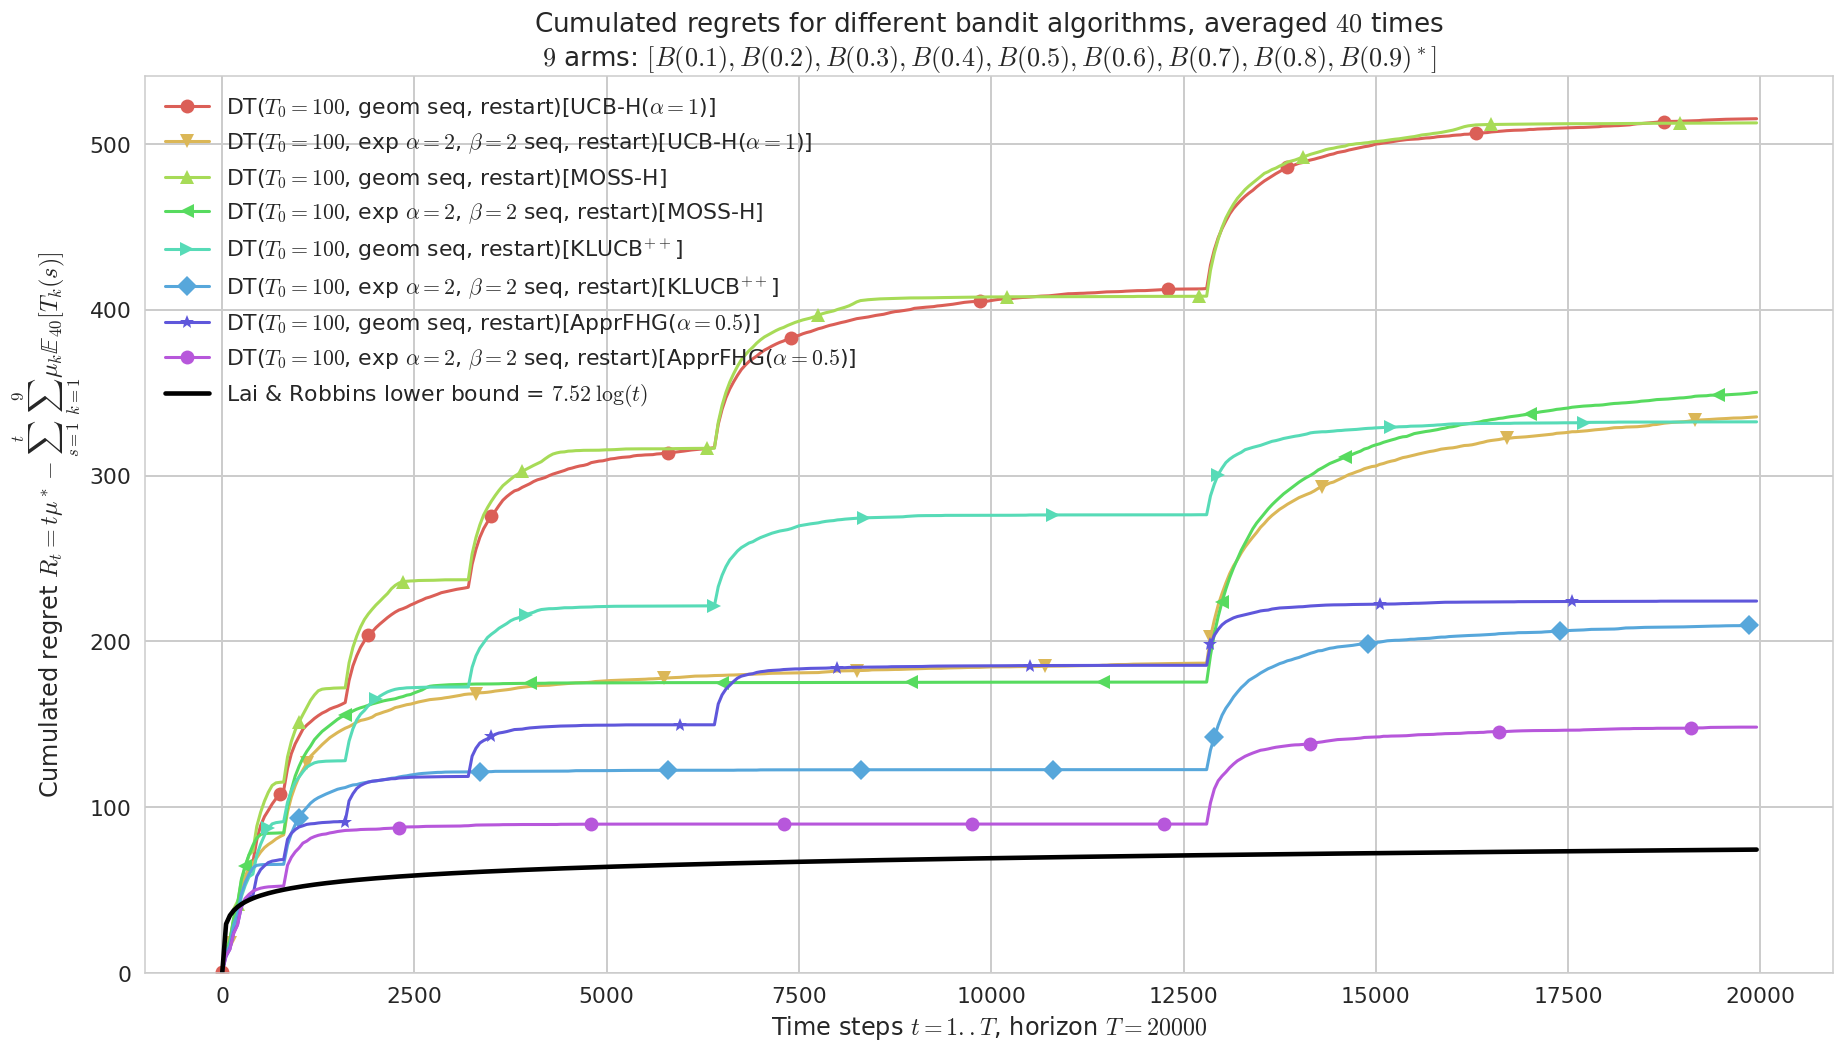

In [14]:
fig = plotAll(evaluation, 0)

## Visualisation the lower-bound for algorithms that restart at breaking points

In [15]:
DEFAULT_FIRST_HORIZON = 100

def lower_bound_with_breakpoints(next_horizon, horizon, env,
                                 first_horizon=DEFAULT_FIRST_HORIZON,
                                 fig=None, marker=None):
    points, gap = breakpoints(next_horizon, first_horizon, horizon)
    X = np.arange(1, horizon)
    Y = np.log(X)
    # Durty estimate
    for estimate_horizon in points:
        if estimate_horizon <= horizon:
            before_breakpoint = np.max(np.where(X == estimate_horizon - 1)[0])
            lower_bound_before_breakpoint = Y[before_breakpoint]
            print("At time {}, lowerbound was {}".format(estimate_horizon, lower_bound_before_breakpoint))
            after = np.where(X >= estimate_horizon)
            Y[after] = np.log(X[after] - X[before_breakpoint]) + lower_bound_before_breakpoint
    if fig is None:  # new figure if needed
        fig, ax = plt.subplots()
        ax.set_xlabel("Time steps t=1..T, $T = {}$".format(horizon))
        ax.set_ylabel("Regret lower-bound")
        ax.set_title("Lai & Robbins lower-bound for problem with $K={}$ arms and $C_K={:.3g}$\nAnd doubling trick with restart points ({})".format(env.nbArms, env.lowerbound(), next_horizon.__latex_name__))
    else:
        ax = fig.axes[0]
        # https://stackoverflow.com/a/26845924/
        ax_legend = ax.legend()
        ax_legend.remove()
    complexity = env.lowerbound()
    ax.plot(X, complexity * Y,
            'k--' if marker is None else '{}k--'.format(marker),
            markevery=(0.0, 0.1),
            label="LB, DT restart ({})".format(next_horizon.__latex_name__))
    legend(fig=fig)
    fig.show()
    return fig

At time 100, lowerbound was 4.59511985013459
At time 100, lowerbound was 4.59511985013459
At time 200, lowerbound was 9.20029003612268
At time 800, lowerbound was 15.597219691338827
At time 12800, lowerbound was 24.989881620108964


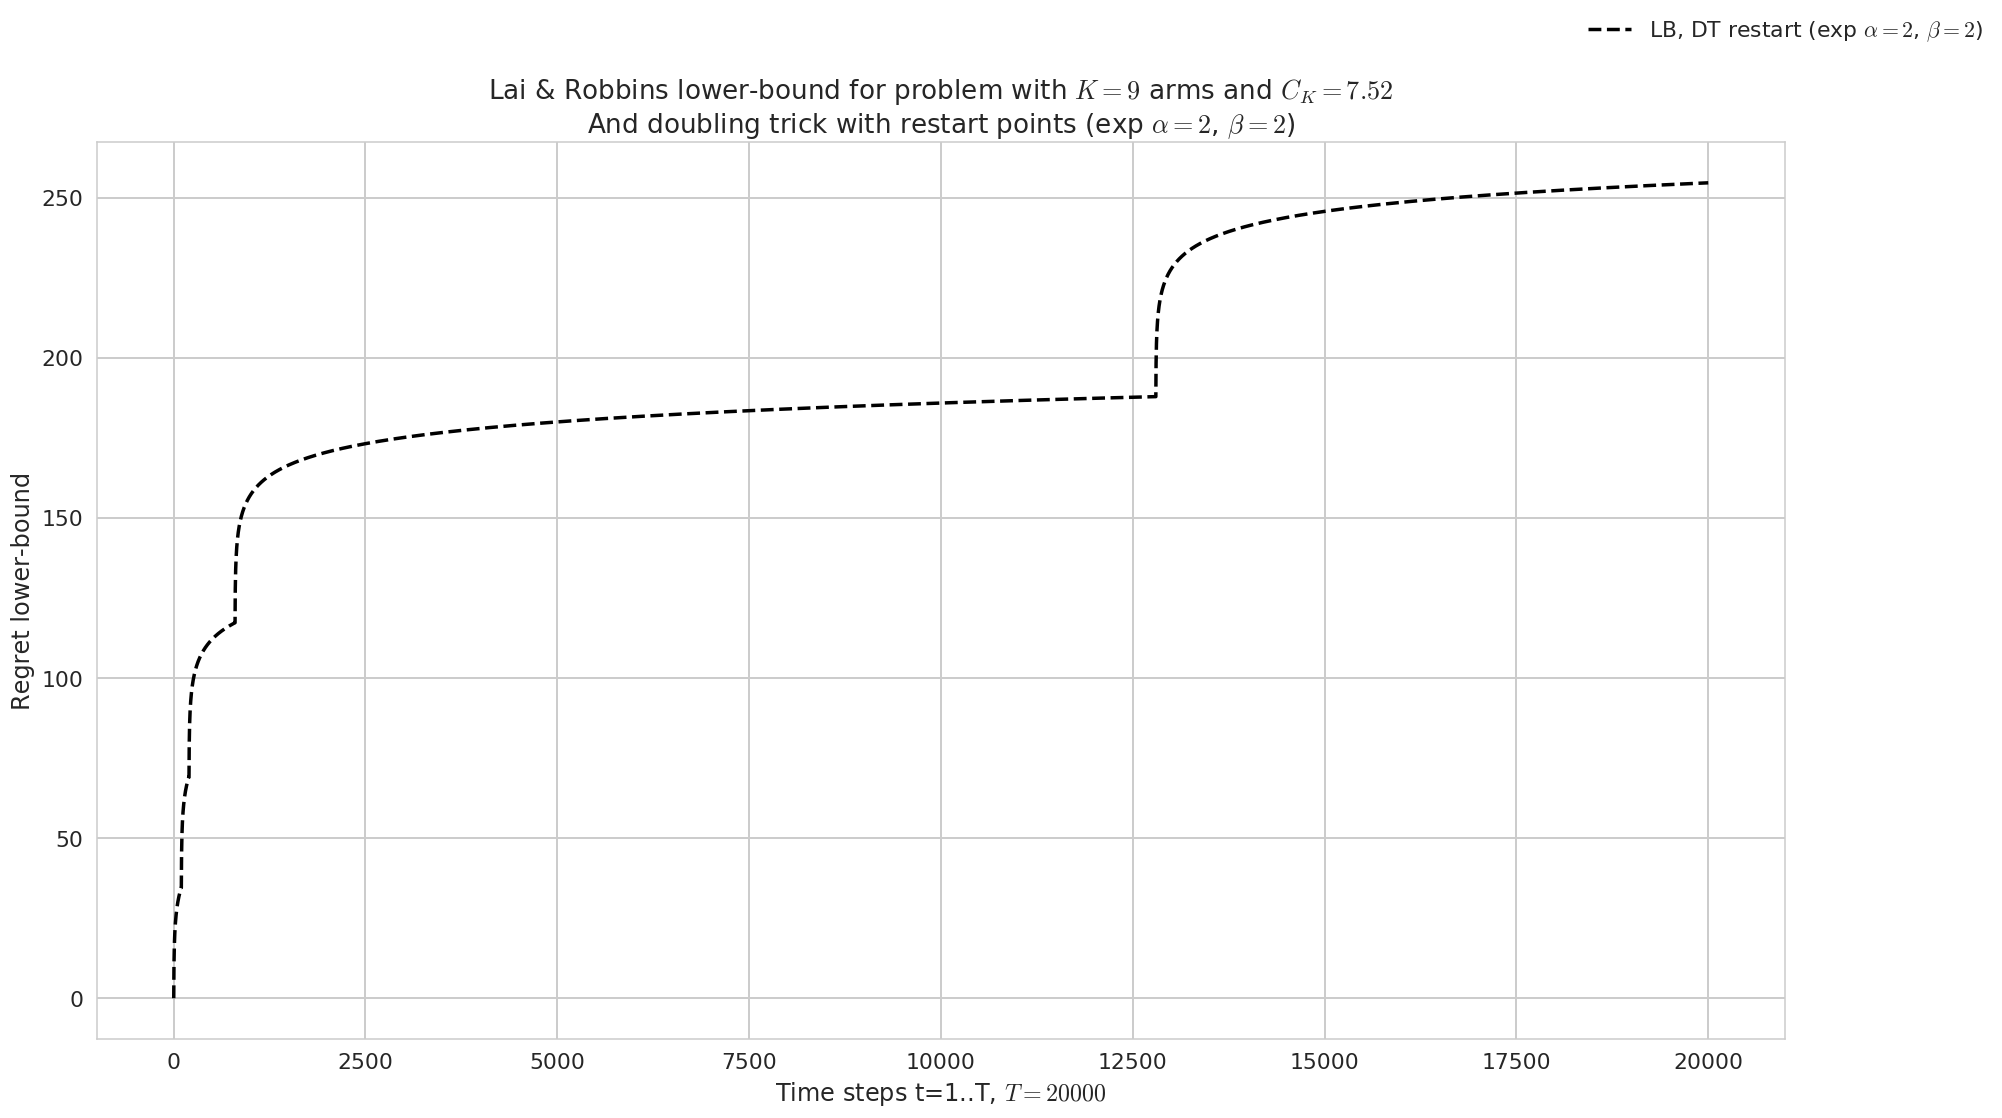

In [16]:
_ = lower_bound_with_breakpoints(next_horizon__exponential_generic, HORIZON, evaluation.envs[0])

## Seeing the lower-bound on the regret plot


Final ranking for this environment #0 :
- Policy 'DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[ApprFHG($\alpha=0.5$)]'	was ranked	1 / 8 for this simulation (last regret = 148.29).
- Policy 'DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[KLUCB$^{++}$]'	was ranked	2 / 8 for this simulation (last regret = 209.7).
- Policy 'DT($T_0=100$, geom seq, restart)[ApprFHG($\alpha=0.5$)]'	was ranked	3 / 8 for this simulation (last regret = 224.32).
- Policy 'DT($T_0=100$, geom seq, restart)[KLUCB$^{++}$]'	was ranked	4 / 8 for this simulation (last regret = 332.43).
- Policy 'DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[UCB-H($\alpha=1$)]'	was ranked	5 / 8 for this simulation (last regret = 335.25).
- Policy 'DT($T_0=100$, exp $\alpha=2$, $\beta=2$ seq, restart)[MOSS-H]'	was ranked	6 / 8 for this simulation (last regret = 350.03).
- Policy 'DT($T_0=100$, geom seq, restart)[MOSS-H]'	was ranked	7 / 8 for this simulation (last regret = 512.74).
- Policy 'DT($T_0=100$, geom seq

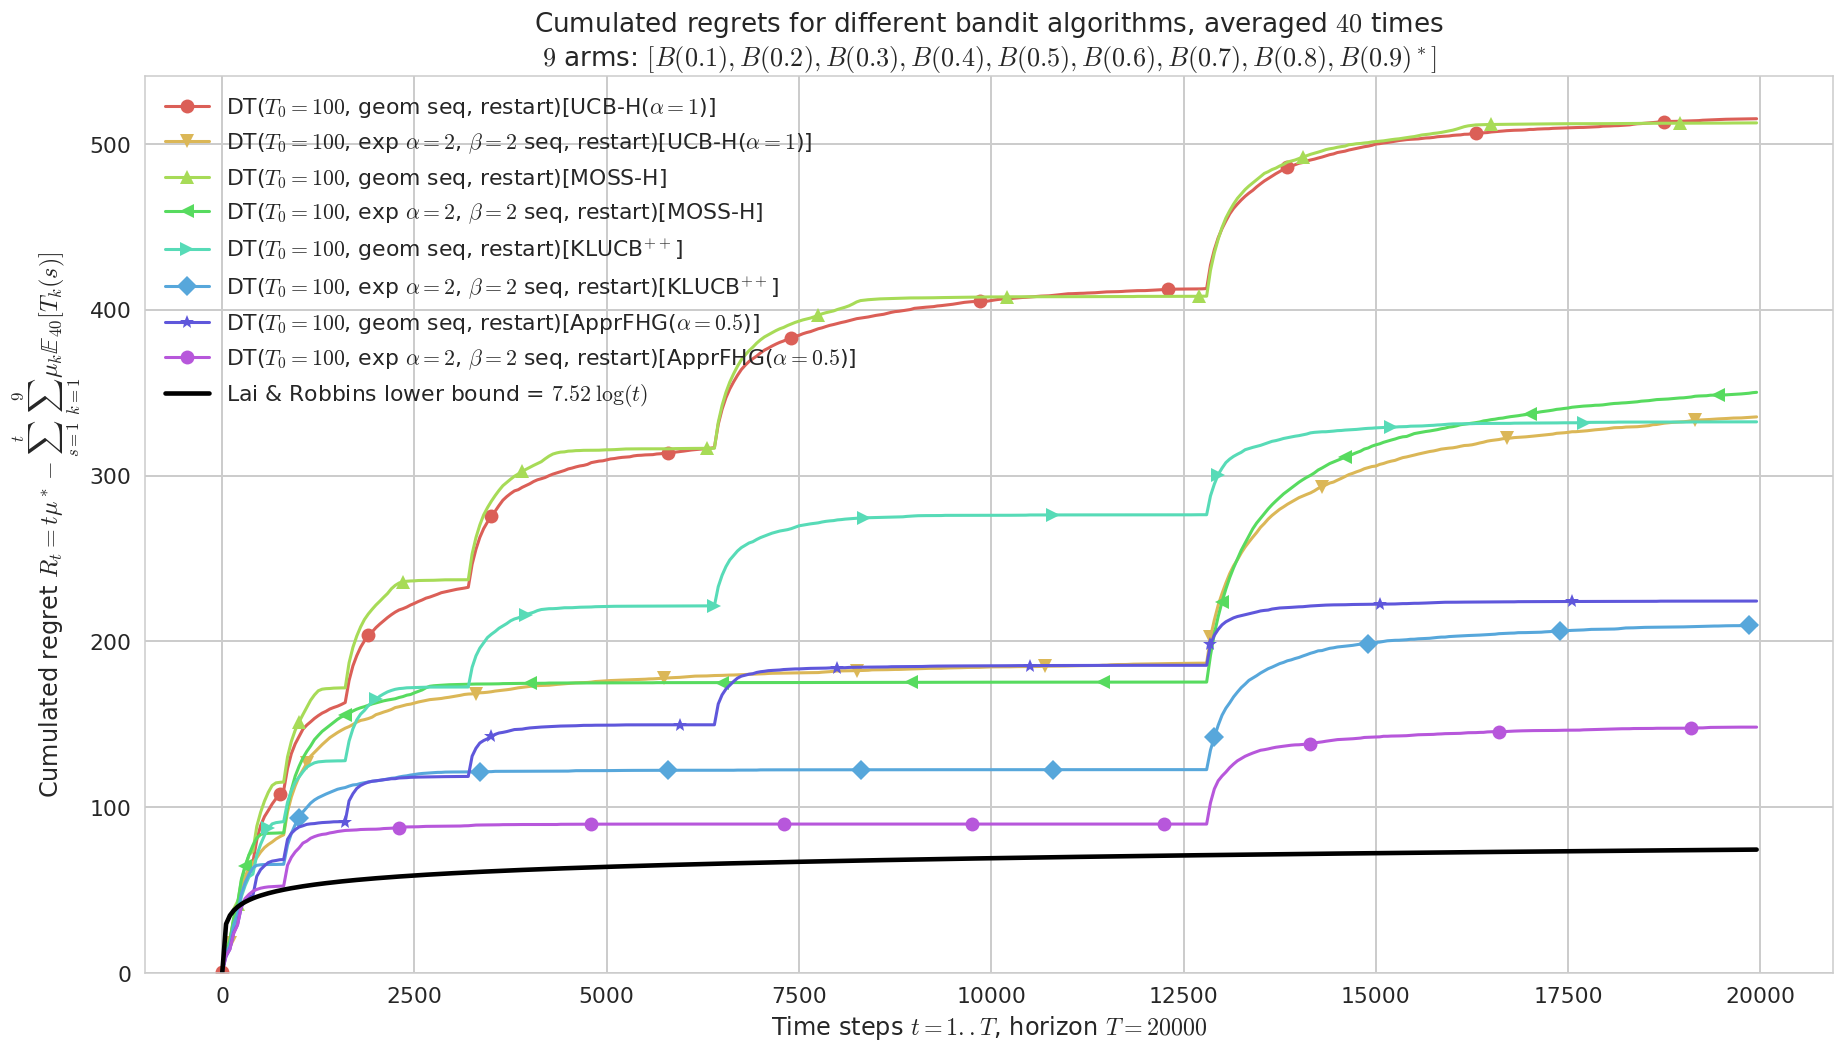

In [17]:
fig = plotAll(evaluation, 0)

In [18]:
markers = makemarkers(len(NEXT_HORIZONS))

In [19]:
for i, next_horizon in enumerate(NEXT_HORIZONS):
    fig = lower_bound_with_breakpoints(next_horizon, HORIZON, evaluation.envs[0], fig=fig, marker=markers[i])

At time 100, lowerbound was 4.59511985013459
At time 200, lowerbound was 9.20029003612268
At time 400, lowerbound was 14.498607402670718
At time 800, lowerbound was 20.4900719497787
At time 1600, lowerbound was 27.174683677446627
At time 3200, lowerbound was 34.5524425856745
At time 6400, lowerbound was 42.62334867446232
At time 12800, lowerbound was 51.38740194381008
At time 100, lowerbound was 4.59511985013459
At time 100, lowerbound was 4.59511985013459
At time 200, lowerbound was 9.20029003612268
At time 800, lowerbound was 15.597219691338827
At time 12800, lowerbound was 24.989881620108964


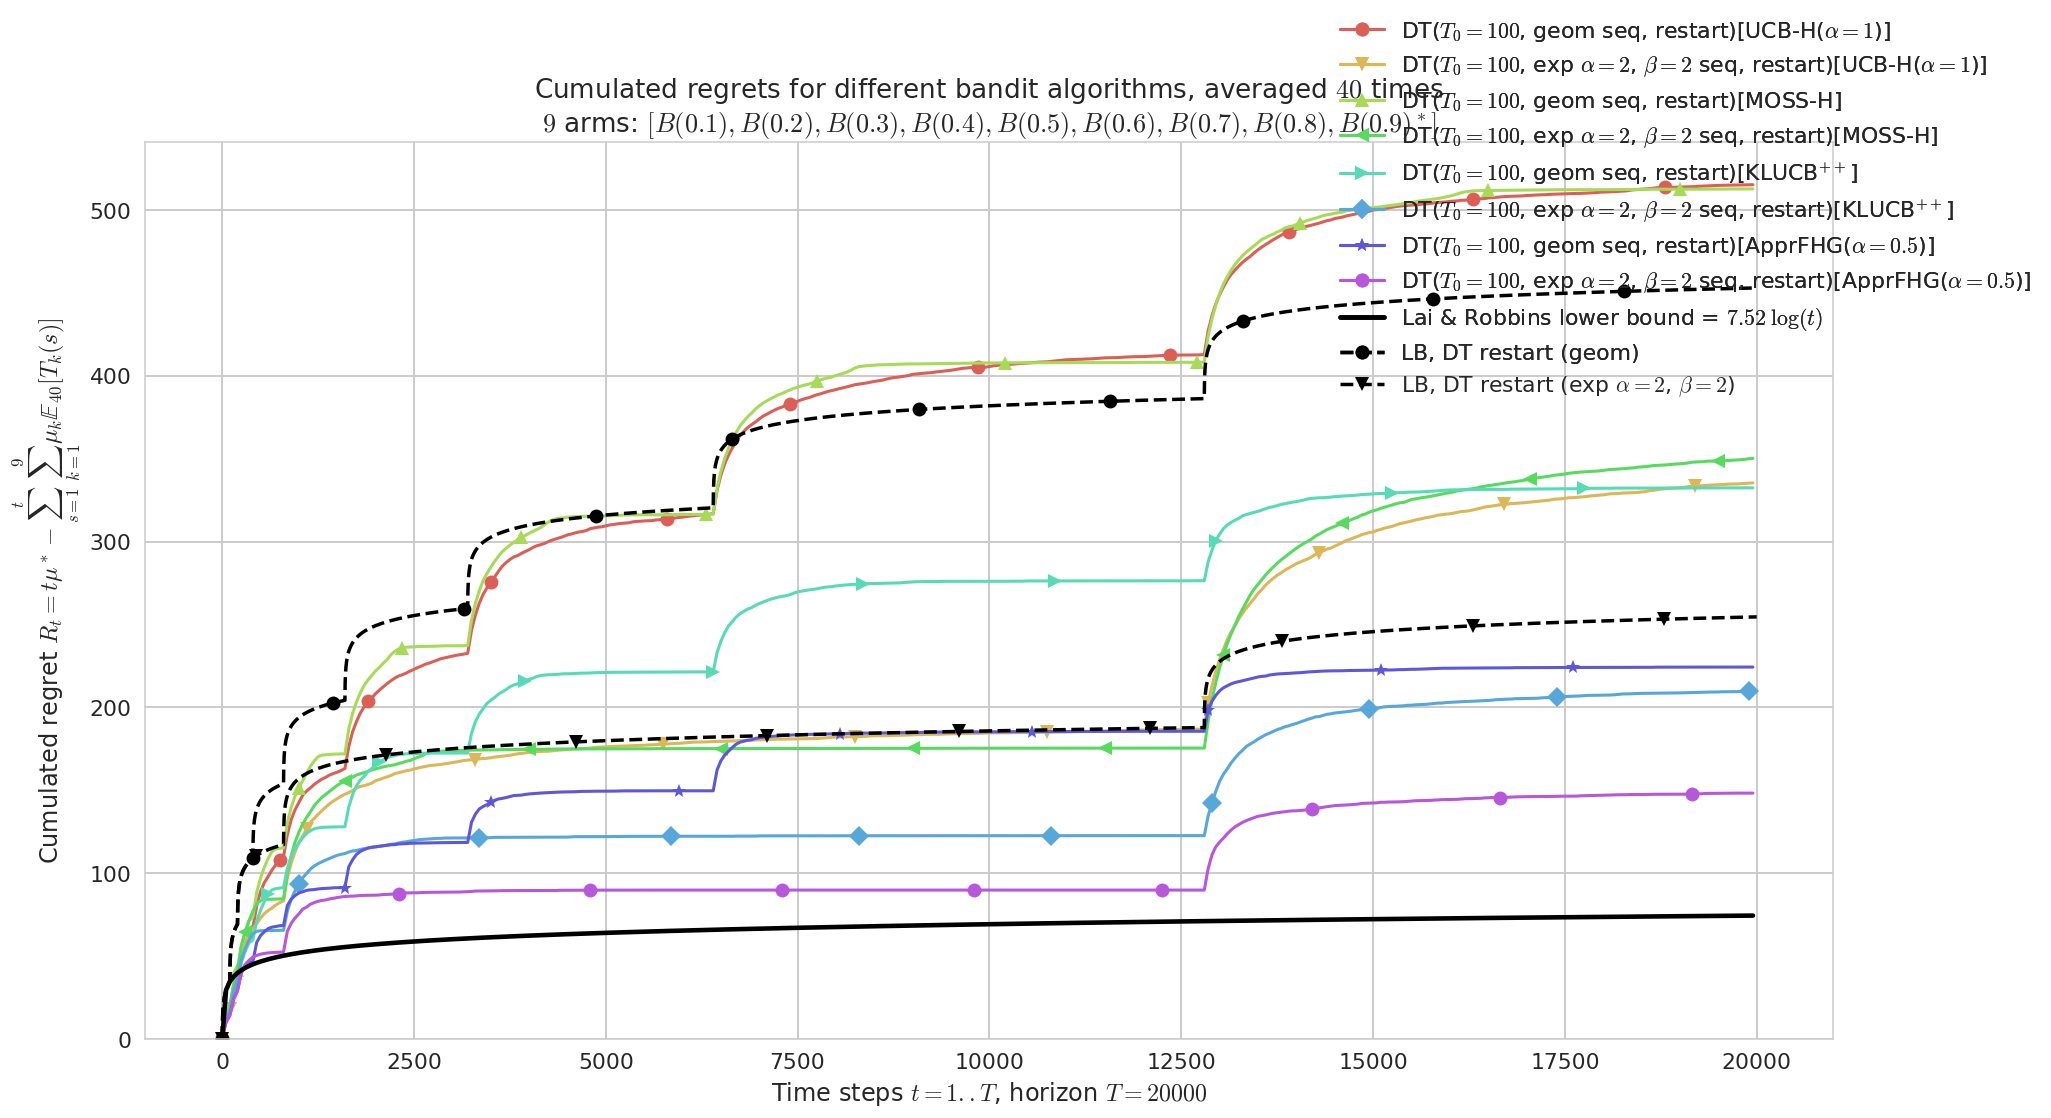

In [20]:
fig

## Conclusion

That's it for today, folks!